In [1]:
%matplotlib inline
import numpy
import math
import matplotlib.pyplot as plt

Further analysis and description can be obtained in the pdf file in the same repository.

Modeliing Couette Flow, 
$$
    u_t = -p_x + \frac{1}{Re}u_{yy}
$$
Time independent problem ($ p_x = \frac{1}{Re}u_{yy}$):
$$
\frac{u_{j-1} - 2u_j + u_{j+1}}{h^2} = \frac{1}{Re} \frac{\partial P}{\partial x}
$$
So the equation to solve is:
$$
u_j = \frac{u_{j-1} + u_{j+1}}{2} -  \frac{h^2}{2Re} \frac{\partial P}{\partial x}
$$
Time dependent problem (Use crank nicholson):



In [2]:
# Funtion to solve 1-d steady state couette flow problem
def solve_coutte_flow(p1,p2,Re,m,max_iter,u_0,flag):

    y= numpy.linspace(0.0,1.0,m+2)
    delta_y = 1.0/(m+1)

    u = numpy.zeros(m+2)
    if flag == 1: # Checks for which palte si moving to assign the right Boundary Conditions
        u[-1] = u_0 
    else:
        u[0] = u_0 
    
    dp = p2 - p1

    u_new = u.copy()

    for k in xrange(max_iter):
        u = u_new.copy()
        for j in range(1,m+1):
            u_new[j] = ((u[j+1] + u[j-1])/2.0) - ((Re*delta_y**2 * dp) / (2.0)) 
    
    return u_new

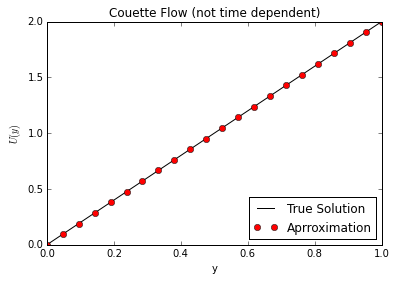

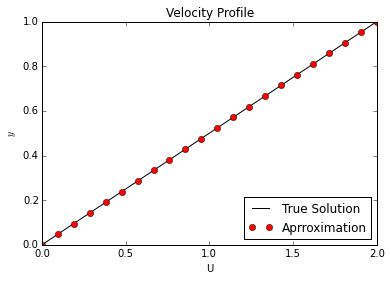

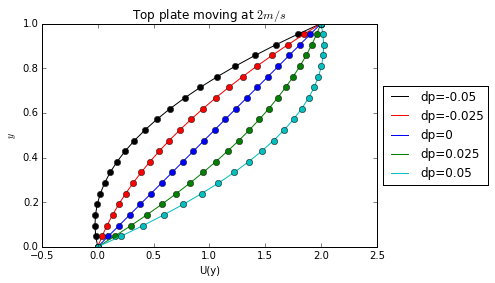

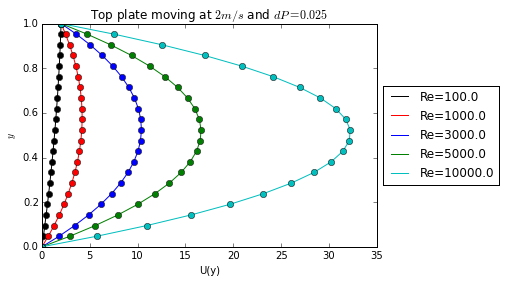

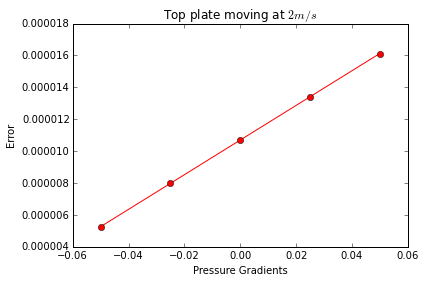

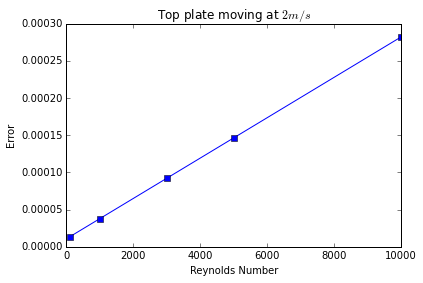

In [3]:
#Top Plate moving with u_0 and a pressure gradient of dp

m = 20
p1 = 0.0
p2 = 0.0
dp = p2 - p1
max_iter = 1000
Re = 100.0
u_0 = 2.0

u_true = lambda y,p1: u_0*y - (p2 - p1)*0.5*Re*y*(1-y)

y= numpy.linspace(0,1,m+2)
delta_y = 1.0/float(m+1)
flag = 1 #('1' for top plate velocity, '0' for bottom plate velocity)
U = solve_coutte_flow(p1,p2,Re,m,max_iter,u_0,flag)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
axes.plot(y, u_true(y,p1), 'k-',label='True Solution')
axes.plot(y, U, 'ro',label='Aprroximation')
axes.set_xlabel("y")
axes.set_ylabel("$U(y)$")
axes.set_title("Couette Flow (not time dependent)")
axes.legend(loc=4)
plt.show()

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
axes.plot(u_true(y,p1), y, '-k',label='True Solution')
axes.plot(U, y, 'ro',label='Aprroximation')
axes.set_xlabel("U")
axes.set_ylabel("$y$")
axes.set_title("Velocity Profile")
axes.legend(loc=4)
plt.show()

gradients = [-.05,-0.025,0,0.025,0.05]
error_dp= []
colors = ['k', 'r', 'b', 'g', 'c','y']
c= 0
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
for p1 in gradients:
    U = solve_coutte_flow(p1,p2,Re,m,max_iter,u_0,flag)
    error_dp.append(numpy.linalg.norm(delta_y*(u_true(y,p1) - U), ord= 1))
    axes.plot(U,y, "-%s" % colors[c], label='dp=%s' % numpy.round(p1, 4))
    axes.plot(u_true(y,p1),y, "o%s" % colors[c])
    axes.set_xlabel("U(y)")
    axes.set_ylabel("$y$")
    axes.set_title("Velocity Profile with different pressure gradients")
    axes.set_title("Top plate moving at $2m/s$")
    #axes.set_xlim([0, u_0])
    axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    c += 1
plt.show()

Reynolds = [100.0,1000.0,3000.0,5000.0,10000.0]
error_re = []
p1 = 0.025
colors = ['k', 'r', 'b', 'g', 'c','y']
c= 0
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
for Re in Reynolds:
    U = solve_coutte_flow(p1,p2,Re,m,max_iter,u_0,flag)
    error_re.append(numpy.linalg.norm(delta_y*(u_true(y,p1) - U), ord= 1))
    axes.plot(U,y, "-%s" % colors[c], label='Re=%s' % numpy.round(Re, 4))
    axes.plot(u_true(y,p1),y, "o%s" % colors[c])
    axes.set_xlabel("U(y)")
    axes.set_ylabel("$y$")
    axes.set_title("Velocity Profile with different Reynolds Number ($dP = 0.025$)")
    axes.set_title("Top plate moving at $2m/s$ and $dP = 0.025$")
    #axes.set_xlim([0, u_0])
    axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    c += 1

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes1 = fig.add_subplot(1, 1, 1)
axes1.plot(gradients,error_dp, '-ro')
axes1.set_xlabel("Pressure Gradients")
axes1.set_ylabel("Error")
axes1.set_title("Effect on error")
axes1.set_title("Top plate moving at $2m/s$")
plt.show()

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes2 = fig.add_subplot(1, 1, 1)
axes2.plot(Reynolds,error_re, '-bs')
axes2.set_xlabel("Reynolds Number")
axes2.set_ylabel("Error")
axes2.set_title("Top plate moving at $2m/s$")
plt.show()

0.000542806957546


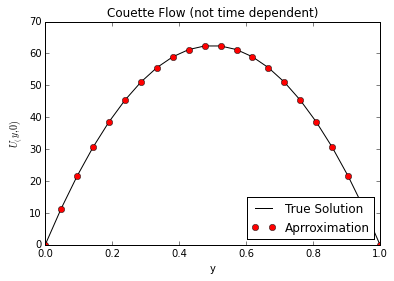

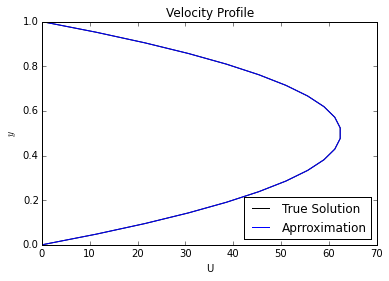

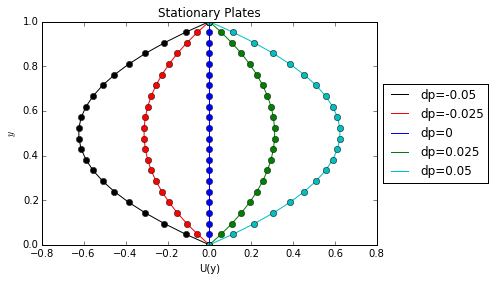

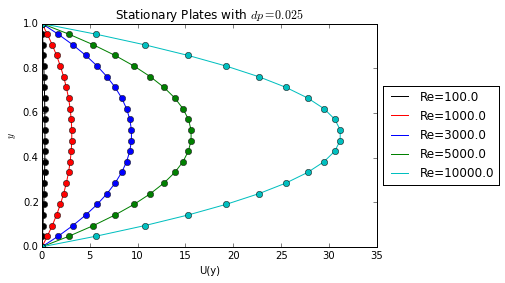

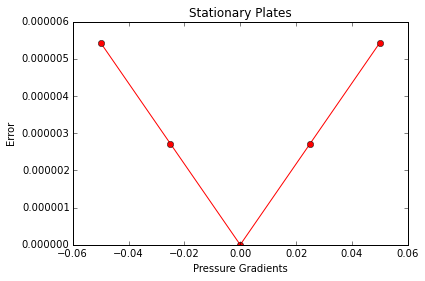

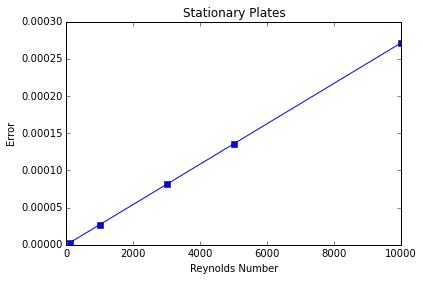

In [4]:
# Stationary Plates and a pressure gradient of dp
m = 20
p1 = 5.0
p2 = 0.0
dp = p2 - p1
max_iter = 1000
Re = 100.0
u_0 = 0.0


u_true = lambda y,p1: ((p2-p1)*0.5*Re*y*(y-1))

y= numpy.linspace(0,1,m+2)
delta_y = 1.0/float(m+1)
flag = 1 #('1' for top plate velocity, '0' for bottom plate velocity) (Doesn't matter for this case)
U = solve_coutte_flow(p1,p2,Re,m,max_iter,u_0,flag)

print numpy.linalg.norm(delta_y*(u_true(y,p1) - U), ord= 1)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
axes.plot(y, u_true(y,p1), 'k-',label='True Solution')
axes.plot(y, U, 'ro',label='Aprroximation')
axes.set_xlabel("y")
axes.set_ylabel("$U_(y,0)$")
axes.set_title("Couette Flow (not time dependent)")
axes.legend(loc=4)
plt.show()

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
axes.plot(u_true(y,p1),y, 'k-',label='True Solution')
axes.plot(U, y, '-b',label='Aprroximation')
axes.set_xlabel("U")
axes.set_ylabel("$y$")
axes.set_title("Velocity Profile")
axes.legend(loc=4)
plt.show()

gradients = [-.05,-0.025,0,0.025,0.05]
error_dp= []
colors = ['k', 'r', 'b', 'g', 'c','y']
c= 0
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
for p1 in gradients:
    U = solve_coutte_flow(p1,p2,Re,m,max_iter,u_0,flag)
    error_dp.append(numpy.linalg.norm(delta_y*(u_true(y,p1) - U), ord= 1))
    axes.plot(U,y, "-%s" % colors[c], label='dp=%s' % numpy.round(p1, 4))
    axes.plot(u_true(y,p1),y, "o%s" % colors[c])
    axes.set_xlabel("U(y)")
    axes.set_ylabel("$y$")
    #axes.set_title("Velocity Profile with different pressure gradients")
    axes.set_title("Stationary Plates")
    #axes.set_xlim([0, u_0])
    axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    c += 1
plt.show()

Reynolds = [100.0,1000.0,3000.0,5000.0,10000.0]
error_re = []
p1 = 0.025
colors = ['k', 'r', 'b', 'g', 'c','y']
c= 0
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
for Re in Reynolds:
    U = solve_coutte_flow(p1,p2,Re,m,max_iter,u_0,flag)
    error_re.append(numpy.linalg.norm(delta_y*(u_true(y,p1) - U), ord= 1))
    axes.plot(U,y, "-%s" % colors[c], label='Re=%s' % numpy.round(Re, 4))
    axes.plot(u_true(y,p1),y, "o%s" % colors[c])
    axes.set_xlabel("U(y)")
    axes.set_ylabel("$y$")
    axes.set_title("Velocity Profile with different Reynolds Number (dp = 0.025)")
    axes.set_title("Stationary Plates with $dp = 0.025$")
    #axes.set_xlim([0, u_0])
    axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    c += 1

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes1 = fig.add_subplot(1, 1, 1)
axes1.plot(gradients,error_dp, '-ro')
axes1.set_xlabel("Pressure Gradients")
axes1.set_ylabel("Error")
axes1.set_title("Error vs dP")
axes1.set_title("Stationary Plates")
plt.show()

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes2 = fig.add_subplot(1, 1, 1)
axes2.plot(Reynolds,error_re, '-bs')
axes2.set_xlabel("Reynolds Number")
axes2.set_ylabel("Error")
axes2.set_title("Error vs Re")
axes2.set_title("Stationary Plates")
plt.show()

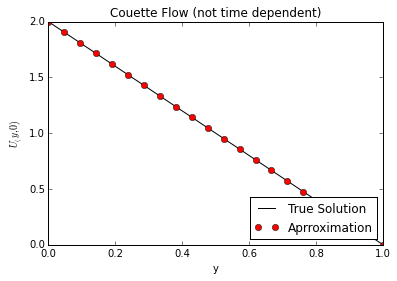

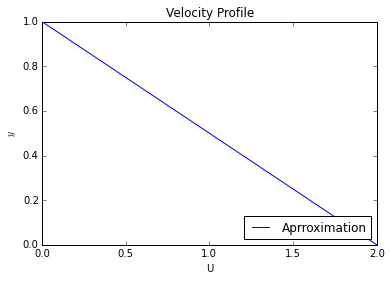

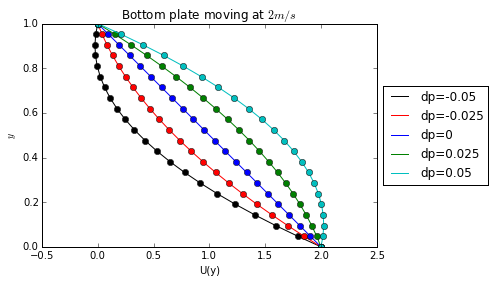

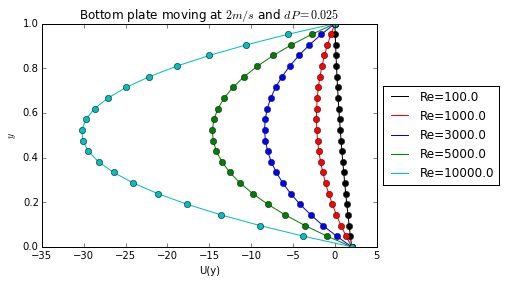

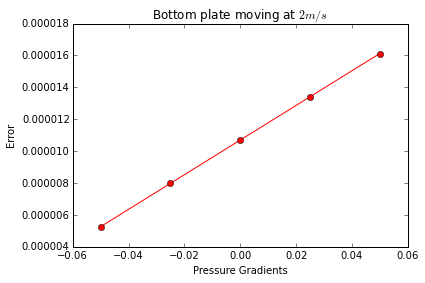

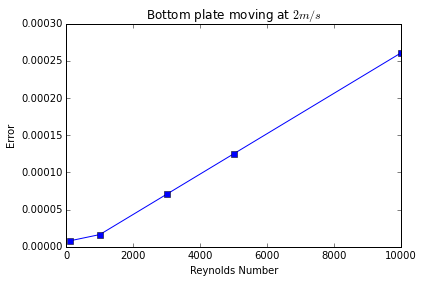

In [5]:
#Bottom Plate Moving with intial velocity of u_0 and a pressure gradient of dp
m = 20
p1 = 0.0
p2 = 0.0
dp = p2 - p1
max_iter = 1000
Re = 100.0
u_0 = 2.0

u_true = lambda y,p1: u_0*(1-y) + ((p2-p1)*0.5*Re*y*(y-1))

y= numpy.linspace(0,1,m+2)
delta_y = 1.0/float(m+1)
flag = 0 #('1' for top plate velocity, '0' for bottom plate velocity)
U = solve_coutte_flow(p1,p2,Re,m,max_iter,u_0,flag)


fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
axes.plot(y, u_true(y,p1), 'k-',label='True Solution')
axes.plot(y, U, 'ro',label='Aprroximation')
axes.set_xlabel("y")
axes.set_ylabel("$U_(y,0)$")
axes.set_title("Couette Flow (not time dependent)")
axes.legend(loc=4)
plt.show()

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
axes.plot(U, y, '-b',label='Aprroximation')
axes.set_xlabel("U")
axes.set_ylabel("$y$")
axes.set_title("Velocity Profile")
axes.legend(loc=4)
plt.show()

gradients = [-.05,-0.025,0,0.025,0.05]
error_dp= []
colors = ['k', 'r', 'b', 'g', 'c','y']
c= 0
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
for p1 in gradients:
    U = solve_coutte_flow(p1,p2,Re,m,max_iter,u_0,flag)
    error_dp.append(numpy.linalg.norm(delta_y*(u_true(y,p1) - U), ord= 1))
    axes.plot(U,y, "-%s" % colors[c], label='dp=%s' % numpy.round(p1, 4))
    axes.plot(u_true(y,p1),y, "o%s" % colors[c])
    axes.set_xlabel("U(y)")
    axes.set_ylabel("$y$")
    #axes.set_title("Velocity Profile with different pressure gradients")
    axes.set_title("Bottom plate moving at $2 m/s$")
    #axes.set_xlim([0, u_0])
    axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    c += 1
plt.show()

Reynolds = [100.0,1000.0,3000.0,5000.0,10000.0]
error_re = []
p1 = -0.025
colors = ['k', 'r', 'b', 'g', 'c','y']
c= 0
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 1, 1)
for Re in Reynolds:
    U = solve_coutte_flow(p1,p2,Re,m,max_iter,u_0,flag)
    error_re.append(numpy.linalg.norm(delta_y*(u_true(y,p1) - U), ord= 1))
    axes.plot(U,y, "-%s" % colors[c], label='Re=%s' % numpy.round(Re, 4))
    axes.plot(u_true(y,p1),y, "o%s" % colors[c])
    axes.set_xlabel("U(y)")
    axes.set_ylabel("$y$")
    axes.set_title("Velocity Profile with different Reynolds Number (dp = 0.025)")
    axes.set_title("Bottom plate moving at $2m/s$ and $dP = 0.025$")
    #axes.set_xlim([0, u_0])
    axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    c += 1

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes1 = fig.add_subplot(1, 1, 1)
axes1.plot(gradients,error_dp, '-ro')
axes1.set_xlabel("Pressure Gradients")
axes1.set_ylabel("Error")
axes1.set_title("Error vs dP")
axes1.set_title("Bottom plate moving at $2m/s$")
plt.show()

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes2 = fig.add_subplot(1, 1, 1)
axes2.plot(Reynolds,error_re, '-bs')
axes2.set_xlabel("Reynolds Number")
axes2.set_ylabel("Error")
axes2.set_title("Error vs Re")
axes2.set_title("Bottom plate moving at $2m/s$")
plt.show()

Time dependent Coutte flow problems:

In [6]:
# function to solve the diffsuion equation using the Crank-Nicholson Method
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
def solve_coutte_flow_time_CN(m, Re, L, t_0, t_final, U_0, g_0, g_1):

    delta_x = L / (m + 1.0)
    C = 0.7
    delta_t_0 = C * delta_x
    N = int((t_final - t_0)/delta_t_0) + 1
    
    t = numpy.linspace(t_0,t_final,N)
    delta_t = t[1] - t[0]
    
    U = numpy.empty((N, m+2))

    U[0, :] = U_0
    
    r = numpy.ones(m) * (delta_t) / (2.0 * Re *delta_x**2)
    A = sparse.spdiags([-r, 1.0 + 2.0 * r, -r], [-1, 0, 1], m, m).tocsr()

    B = sparse.spdiags([r, 1.0 - 2.0 * r, r], [-1, 0, 1],  m, m).tocsr()

    for n in xrange(len(t)-1):
        b = B.dot(U[n, 1:-1])
        b[0] += ( delta_t / (2.0 * Re * delta_x**2)) * (g_0(t[n]) + g_0(t[n+1]))
        b[-1] += (delta_t / (2.0 * Re * delta_x**2)) * (g_1(t[n]) + g_1(t[n+1]))
    
        U[n+1, 1:-1] = linalg.spsolve(A, b)
    
    U[:,0] = g_0(t)
    U[:,-1] = g_1(t)

    return U[-1,:]

In [7]:
# function to solve the diffsuion equation using the Crank-Nicholson Method
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
def solve_coutte_flow_time_BE(m, Re, L, t_0, t_final, U_0, g_0, g_1):

    delta_x = L / (m + 1.0)
    C = 4.0
    delta_t_0 = C * delta_x
    N = int((t_final - t_0)/delta_t_0) + 1
    
    t = numpy.linspace(t_0,t_final,N)
    delta_t = t[1] - t[0]
    
    U = numpy.empty((N, m+2))

    U[0, :] = U_0
    
    r = numpy.ones(m) * (delta_t) / (Re *delta_x**2)
    A = sparse.spdiags([-r, 1.0 + 2.0 * r, -r], [-1, 0, 1], m, m).tocsr()

    for n in xrange(len(t)-1):
        b = U[n, 1:-1]
        b[0] += ( delta_t / (Re * delta_x**2)) * g_0(t[n+1])
        b[-1] += (delta_t / (Re * delta_x**2)) * g_1(t[n+1])
    
        U[n+1, 1:-1] = linalg.spsolve(A, b)
    
    U[:,0] = g_0(t)
    U[:,-1] = g_1(t)

    return U[-1,:]

In [8]:
# Analytical solution for whne the bottom plate is moving with velocity u_0
def true_solution(y,t,Re,u_0):
    
    U = numpy.empty(y.shape)
    
    for i in range(0,len(y)):
        
        U[i] = u_0*(1.0 - math.erf((math.sqrt(Re)*y[i]) / (2*math.sqrt(t))))
    
    return U

Error CN = 0.000369609215704
Succesful


/Users/Akshay/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars
/Users/Akshay/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: divide by zero encountered in double_scalars


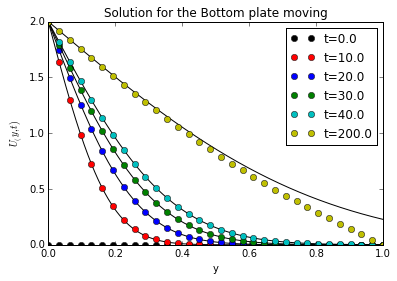

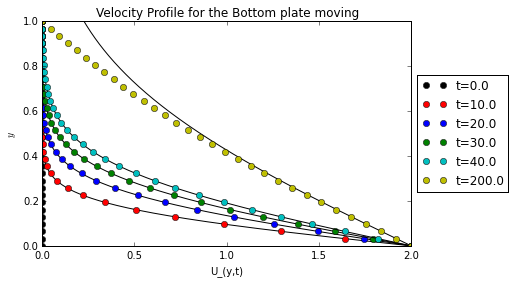

In [9]:
# bottom plate is moving with velocity u_0
p1 = 0.0
p2 = 0.0
dp = p2 - p1
Re = 1000.0
u_0 = 2.0
L = 1.0

y= numpy.linspace(0,1,m+2)
delta_y = 1.0/float(m+1)

g_0 = lambda t: u_0
g_1 = lambda t: 0

m = 30
y = numpy.linspace(0.0, L, m + 2)
y_fine = numpy.linspace(0.0, L, 1000)
delta_y = L / float(m + 1)
output_times = (0.0, 10.0, 20.0, 30.0,40.0,200.0)

# Solve
U = numpy.empty((len(output_times), m + 2))
U[0, :] = numpy.zeros(y.shape)

for (n, t) in enumerate(output_times[1:]):
    U[n + 1, :] = solve_coutte_flow_time_CN(m, Re, L, output_times[n], t, U[n, :], g_0, g_1)
    
error = numpy.linalg.norm(delta_y * (U[-2, :] - true_solution(y,output_times[-2],Re,u_0)), ord=1)
print "Error CN = %s" % error
if error < 1e-3:
    print "Succesful"


# Plot some of the results
colors = ['k', 'r', 'b', 'g', 'c','y']
fig = plt.figure()
axes_CN = fig.add_subplot(1, 1, 1)
for (n, t) in enumerate(output_times):
    axes_CN.plot(y_fine, true_solution(y_fine,t,Re,u_0), 'k-')
    axes_CN.plot(y, U[n, :], "o%s" % colors[n], label='t=%s' % numpy.round(t, 4))
    axes_CN.set_xlabel("y")
    axes_CN.set_ylabel("$U_(y,t)$")
    axes_CN.set_title("Solution for the Bottom plate moving")
    #axes_CN.set_xlim([0, L])
    axes_CN.legend(loc='upper right')

fig = plt.figure()
axes_CN = fig.add_subplot(1, 1, 1)
for (n, t) in enumerate(output_times):
    axes_CN.plot( true_solution(y_fine,t,Re,u_0),y_fine, 'k-')
    axes_CN.plot( U[n, :],y, "o%s" % colors[n], label='t=%s' % numpy.round(t, 4))
    axes_CN.set_xlabel("U_(y,t)")
    axes_CN.set_ylabel("$y$")
    axes_CN.set_title("Velocity Profile for the Bottom plate moving")
    #axes_CN.set_xlim([0, u_0])
    axes_CN.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [10]:
# Analytical solution for whne the top plate is moving with velocity u_0
def true_solution_1(y,t,Re,u_0):
    
    U = numpy.empty(y.shape)
    
    for i in range(0,len(y)):
        
        U[i] = u_0*(math.erf((math.sqrt(Re)*y[i]) / (2*math.sqrt(t))))
    
    return U

Error = 0.000369609215694
Succesful


/Users/Akshay/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars
/Users/Akshay/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: divide by zero encountered in double_scalars


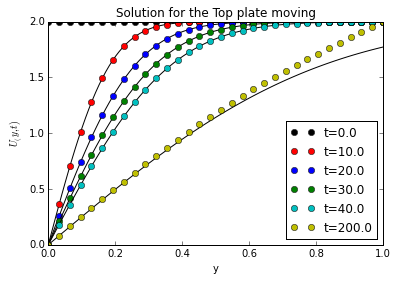

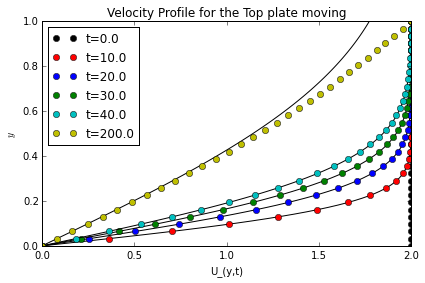

In [11]:
#top plate is moving with velocity u_0
p1 = 0.0
p2 = 0.0
dp = p2 - p1
Re = 1000.0
u_0 = 2.0
L = 1.0

y= numpy.linspace(0,1,m+2)
delta_y = 1.0/float(m+1)

g_0 = lambda t: 0
g_1 = lambda t: u_0

# Discretization and output times
m = 30
y = numpy.linspace(0.0, L, m + 2)
y_fine = numpy.linspace(0.0, L, 100)
delta_y = L / float(m + 1)
output_times = (0.0, 10.0, 20.0, 30.0,40.0,200.0)

# Solve
U = numpy.empty((len(output_times), m + 2))
U[0, :] = u_0*numpy.ones(y.shape)

for (n, t) in enumerate(output_times[1:]):
    
    U[n + 1, :] = solve_coutte_flow_time_CN(m, Re, L, output_times[n], t, U[n, :], g_0, g_1)
    
error = numpy.linalg.norm(delta_y * (U[-2, :] - true_solution_1(y,output_times[-2],Re,u_0)), ord=1)
print "Error = %s" % error
if error < 1e-3:
    print "Succesful"

# Plot some of the results
colors = ['k', 'r', 'b', 'g', 'c','y']
fig = plt.figure()
axes_CN = fig.add_subplot(1, 1, 1)
for (n, t) in enumerate(output_times):
    axes_CN.plot(y_fine, true_solution_1(y_fine,t,Re,u_0), 'k-')
    axes_CN.plot(y, U[n, :], "o%s" % colors[n], label='t=%s' % numpy.round(t, 4))
    axes_CN.set_xlabel("y")
    axes_CN.set_ylabel("$U_(y,t)$")
    axes_CN.set_title("Solution for the Top plate moving")
    #axes_CN.set_xlim([0, L])
    axes_CN.legend(loc='lower right')

fig = plt.figure()
axes_CN = fig.add_subplot(1, 1, 1)
for (n, t) in enumerate(output_times):
    axes_CN.plot( true_solution_1(y_fine,t,Re,u_0),y_fine, 'k-')
    axes_CN.plot( U[n, :],y, "o%s" % colors[n], label='t=%s' % numpy.round(t, 4))
    axes_CN.set_xlabel("U_(y,t)")
    axes_CN.set_ylabel("$y$")
    axes_CN.set_title("Velocity Profile for the Top plate moving")
    #axes_CN.set_xlim([0, u_0])
    axes_CN.legend(loc='upper left')

plt.tight_layout()
plt.show()

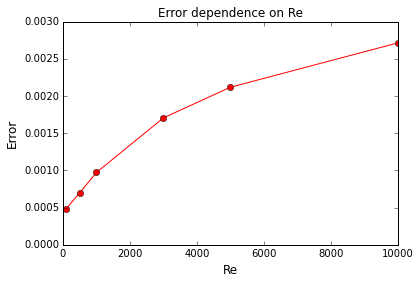

In [12]:
# Studying the realtionship between Reynolds number and the error
p1 = 0.0
p2 = 0.0
dp = p2 - p1
Re = 1000.0
u_0 = 2.0
L = 1.0

y= numpy.linspace(0,1,m+2)
delta_y = 1.0/float(m+1)

g_0 = lambda t: u_0
g_1 = lambda t: 0

# Discretization and output times
m = 30
y = numpy.linspace(0.0, L, m + 2)
y_fine = numpy.linspace(0.0, L, 100)
delta_y = L / float(m + 1)
output_times = (0.0,1.0,2.0,3.0,4.0, 5.0)

re_range = [100.0,500.0,1000.0,3000.0,5000.0,10000.0]
error = []

for Re in re_range:

    U = numpy.empty((len(output_times), m + 2))
    U[0, :] = u_0*numpy.zeros(y.shape)
    
    for (n, t) in enumerate(output_times[1:]):
        U[n + 1, :] = solve_coutte_flow_time_CN(m, Re, L, output_times[n], t, U[n, :], g_0, g_1)
        
    error.append(numpy.linalg.norm(delta_y * (U[-1, :] - true_solution(y,output_times[-1],Re,u_0)), ord=1))
    
error = numpy.array(error)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(re_range, error, "-ro")
axes.set_title("Error dependence on Re",fontsize = 12)
axes.set_xlabel("Re",fontsize = 12)
axes.set_ylabel("Error",fontsize = 12)
plt.show()

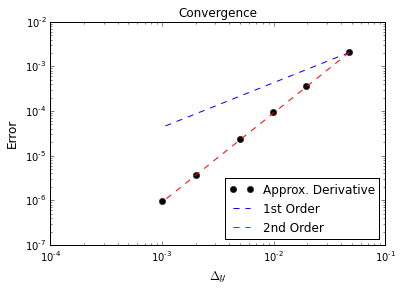

In [13]:
# Studying the Convergence behaviour for Crank Nicholson method, can be easily extended to Backward Euler too
# Bottom plate moving
p1 = 0.0
p2 = 0.0
dp = p2 - p1
Re = 1000.0
u_0 = 2.0
L = 1.0

g_0 = lambda t: u_0
g_1 = lambda t: 0

# Discretization and output times
y_fine = numpy.linspace(0.0, L, 100)
output_times = (0.0,1.0,2.0,3.0,4.0, 5.0)

m_range = [20,50,100,200,500,1000]
error = []
del_y = []

for m in m_range:

    y= numpy.linspace(0,1,m+2)
    delta_y = 1.0/float(m+1)
    del_y.append(delta_y)
    U = numpy.empty((len(output_times), m + 2))
    U[0, :] = u_0*numpy.zeros(y.shape)
    
    for (n, t) in enumerate(output_times[1:]):
        U[n + 1, :] = solve_coutte_flow_time_CN(m, Re, L, output_times[n], t, U[n, :], g_0, g_1)
        
    error.append(numpy.linalg.norm(delta_y * (U[-1, :] - true_solution(y,output_times[-1],Re,u_0)), ord=1))
    
error = numpy.array(error)
del_y = numpy.array(del_y)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(del_y, error, "ko", label="Approx. Derivative")
order_C = lambda delta_y, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_y))
axes.loglog(del_y, order_C(del_y[0], error[0], 1.0) * del_y**1.0, 'b--', label="1st Order")
axes.loglog(del_y, order_C(del_y[0], error[0], 2.0) * del_y**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence",fontsize = 12)
axes.set_xlabel("$\Delta y$",fontsize = 12)
axes.set_ylabel("Error",fontsize = 12)
plt.show()

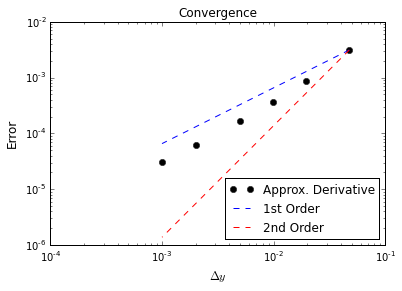

In [14]:
# Studying the Convergence behaviour for Crank Nicholson method, can be easily extended to Backward Euler too
# Top plate moving
p1 = 0.0
p2 = 0.0
dp = p2 - p1
Re = 1000.0
u_0 = 2.0
L = 1.0

g_0 = lambda t: 0
g_1 = lambda t: u_0

# Discretization and output times
y_fine = numpy.linspace(0.0, L, 100)
output_times = (0.0,1.0,2.0,3.0,4.0, 5.0)

m_range = [20,50,100,200,500,1000]
error = []
del_y = []

for m in m_range:

    y= numpy.linspace(0,1,m+2)
    delta_y = 1.0/float(m+1)
    del_y.append(delta_y)
    U = numpy.empty((len(output_times), m + 2))
    U[0, :] = u_0*numpy.ones(y.shape)
    
    for (n, t) in enumerate(output_times[1:]):
        U[n + 1, :] = solve_coutte_flow_time_CN(m, Re, L, output_times[n], t, U[n, :], g_0, g_1)
        
    error.append(numpy.linalg.norm(delta_y * (U[-1, :] - true_solution_1(y,output_times[-1],Re,u_0)), ord=1))
    
error = numpy.array(error)
del_y = numpy.array(del_y)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(del_y, error, "ko", label="Approx. Derivative")
order_C = lambda delta_y, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_y))
axes.loglog(del_y, order_C(del_y[0], error[0], 1.0) * del_y**1.0, 'b--', label="1st Order")
axes.loglog(del_y, order_C(del_y[0], error[0], 2.0) * del_y**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence",fontsize = 12)
axes.set_xlabel("$\Delta y$",fontsize = 12)
axes.set_ylabel("Error",fontsize = 12)
plt.show()

Derivation of discretization for 2-D flow problem (assumptions v = 0, uniform grid):
$$
    \left(\frac{u_{i+1,j} - u_{i-1,j}}{2h} +\frac{4}{Reh^2}\right)u_{i,j} + \left(\frac{u_{i+1,j}}{4h} - \frac{1}{Reh^2}\right)u_{i+1,j} + \left(\frac{u_{i-1,j}}{4h} - \frac{1}{Reh^2}\right)u_{i-1,j} - \frac{u_{i,j+1}}{Reh^2} - \frac{u_{i,j-1}}{Reh^2}  + \frac{dP}{dx} = 0
$$

$$
    u_{i,j} = \frac{1}{A}\left(\frac{u_{i+1,j}^2 + u_{i-1,j}^2}{4h} - \frac{u_{i+1,j} + u_{i-1,j} + u_{i,j-1} + u_{i,j+1}}{Reh^2} + \frac{dP}{dx} \right)
    $$
$$
    A = -\left( \frac{u_{i+1,j} - u_{i-1,j}}{2h} +\frac{4}{Reh^2} \right)
$$
The derivation is done on a staggered grid and the indecies are adjusted to a code based approach. The approach mentioned below is not working

In [23]:
#Function to solve the finite difference scheme using gauss sidel
def solve_2d_plate_flow(p1,p2,Re,m,max_iter):

    x= numpy.linspace(0.0,1.0,m+2)
    y= numpy.linspace(0.0,1.0,m+2)
    delta_x = 1.0/(m+1)
    delta_y = 1.0/(m+1)

    h = delta_x

    u = numpy.zeros([m+2,m+2])
    u[1:m+1,1:m+1] = 1.0

    del_p = p2 - p1

    u_new = u.copy()

    for k in xrange(max_iter):
        u = u_new.copy()
        for i in range(1,m+1):
            for j in range(1,m+1):
                # Continuity Equation
                #u[i,j] = u[i-1,j]
                u[i+1,j] = u[i,j]
                
                A = -1/(((u[i+1,j] - u[i-1,j])/(2*h)) + ( 4/( Re*h**2 )))
                
                u_new[i,j] = A*((u[i+1,j]**2/(4*h)) + (u[i-1,j]**2/(4*h)) -\
                           ( (u[i-1,j]+u[i+1,j]+u[i,j-1]+u[i,j+1]) /(Re*h**2)) +\
                           (del_p/h) )
    
    return u_new

284.723730395


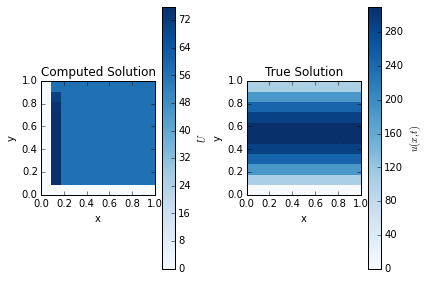

In [22]:
# Problem setup for flow with stationary plates and pressure gradient of dp
m = 10
p1 = 5.0
p2 = 0.0
max_iter = 1000
Re = 500.0

u_true = lambda x,y: y*(1-y)*(Re)*(p1 - p2)*0.5
h = 1.0/(m+1)
x= numpy.linspace(0,1,m+2)
y= numpy.linspace(0,1,m+2)
X,Y = numpy.meshgrid(x,y)
X = X.transpose()
Y = Y.transpose()

U = solve_2d_plate_flow(p1,p2,Re,m,max_iter)

print numpy.linalg.norm(h*(u_true(X,Y) - U), ord= 1)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth())
axes = fig.add_subplot(1, 2, 1, aspect='equal')
plot = axes.pcolor(X, Y, U, vmax=numpy.amax(U), vmin=numpy.amin(U), cmap=plt.get_cmap("Blues"))
fig.colorbar(plot, label="$U$")
axes.set_title("Computed Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes = fig.add_subplot(1, 2, 2, aspect='equal')
plot = axes.pcolor(X, Y, u_true(X, Y), vmax=numpy.amax(u_true(X, Y)), vmin=numpy.amin(u_true(X, Y)), cmap=plt.get_cmap("Blues"))
fig.colorbar(plot, label="$u(x,t)$")
axes.set_title("True Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")

plt.tight_layout()
plt.show()